In [1]:
import json
import re

import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open("bench.json") as f:
    data = json.load(f)["benchmarks"]
data

[{'name': 'BM_Minimize<tb::NaiveMinimize>/1000000',
  'family_index': 0,
  'per_family_instance_index': 0,
  'run_name': 'BM_Minimize<tb::NaiveMinimize>/1000000',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
  'iterations': 3,
  'real_time': 242136916.30090275,
  'cpu_time': 242131274.0,
  'time_unit': 'ns'},
 {'name': 'BM_Minimize<tb::DequeMinimize>/1000000',
  'family_index': 1,
  'per_family_instance_index': 0,
  'run_name': 'BM_Minimize<tb::DequeMinimize>/1000000',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
  'iterations': 30,
  'real_time': 23362629.4725885,
  'cpu_time': 23362553.133333318,
  'time_unit': 'ns'},
 {'name': 'BM_Minimize<tb::ArgMinMinimize>/1000000',
  'family_index': 2,
  'per_family_instance_index': 0,
  'run_name': 'BM_Minimize<tb::ArgMinMinimize>/1000000',
  'run_type': 'iteration',
  'repetitions': 1,
  'repetition_index': 0,
  'threads': 1,
  'iterations': 31,
  'real_time'

In [3]:
with open("bench.json") as f:
    data = json.load(f)

df_benchmarks = pl.from_dicts(
    [
        {
            **run,
            "n_bases": int(run["name"].split("/")[1]),
            "function": re.search(r"(?<=<)(.*?)(?=>)", run["name"]).group(),
        }
        for run in data["benchmarks"]
    ]
)

df_benchmarks

name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,n_bases,function
str,i64,i64,str,str,i64,i64,i64,i64,f64,f64,str,i64,str
"""BM_Minimize<tb::NaiveMinimize>…",0,0,"""BM_Minimize<tb::NaiveMinimize>…","""iteration""",1,0,1,3,2.4214e8,2.42131274e8,"""ns""",1000000,"""tb::NaiveMinimize"""
"""BM_Minimize<tb::DequeMinimize>…",1,0,"""BM_Minimize<tb::DequeMinimize>…","""iteration""",1,0,1,30,2.3363e7,2.3363e7,"""ns""",1000000,"""tb::DequeMinimize"""
"""BM_Minimize<tb::ArgMinMinimize…",2,0,"""BM_Minimize<tb::ArgMinMinimize…","""iteration""",1,0,1,31,2.2493e7,2.2494e7,"""ns""",1000000,"""tb::ArgMinMinimize"""
"""BM_Minimize<tb::ArgMinUnrolled…",3,0,"""BM_Minimize<tb::ArgMinUnrolled…","""iteration""",1,0,1,61,1.1487e7,1.1487e7,"""ns""",1000000,"""tb::ArgMinUnrolledMinimize"""
"""BM_Minimize<tb::NtHashArgMinMi…",4,0,"""BM_Minimize<tb::NtHashArgMinMi…","""iteration""",1,0,1,60,1.1620e7,1.1620e7,"""ns""",1000000,"""tb::NtHashArgMinMinimize"""
"""BM_Minimize<tb::ArgMinRecovery…",5,0,"""BM_Minimize<tb::ArgMinRecovery…","""iteration""",1,0,1,66,1.0514e7,1.0514e7,"""ns""",1000000,"""tb::ArgMinRecoveryMinimize"""
"""BM_Minimize<tb::ArgMinRecovery…",6,0,"""BM_Minimize<tb::ArgMinRecovery…","""iteration""",1,0,1,81,8.6053e6,8.6055e6,"""ns""",1000000,"""tb::ArgMinRecoveryUnrolledMini…"
"""BM_Minimize<tb::NtHashRecovery…",7,0,"""BM_Minimize<tb::NtHashRecovery…","""iteration""",1,0,1,80,8.7324e6,8.7326e6,"""ns""",1000000,"""tb::NtHashRecoveryMinimize"""
"""BM_Minimize<tb::SplitWindowMin…",8,0,"""BM_Minimize<tb::SplitWindowMin…","""iteration""",1,0,1,44,1.6038e7,1.6038e7,"""ns""",1000000,"""tb::SplitWindowMinimize"""


In [4]:
x_ticks = df_benchmarks["n_bases"].unique().sort()
y_ticks = df_benchmarks["real_time"].unique().sort().to_numpy()

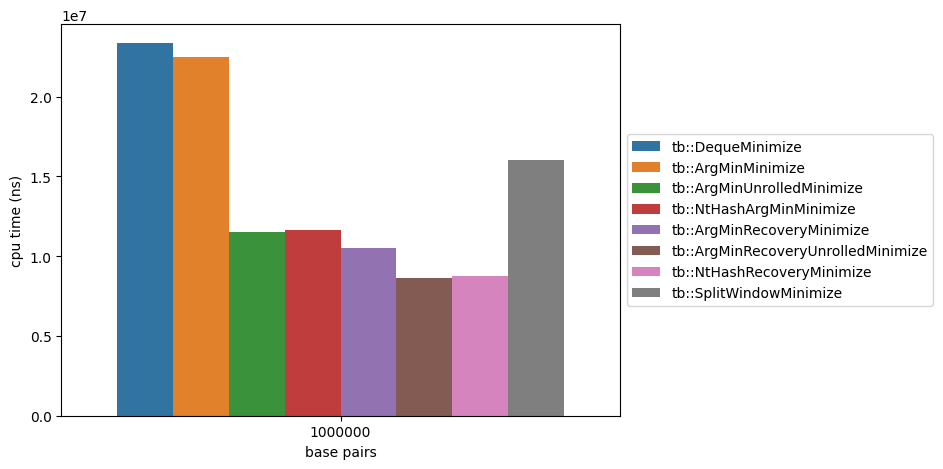

In [5]:
fig = sns.barplot(
    df_benchmarks.filter(pl.col("function") != "tb::NaiveMinimize"),
    x="n_bases",
    y="cpu_time",
    hue="function",
)
plt.tight_layout()
fig.set_ylabel("cpu time (ns)")
fig.set_xlabel("base pairs")
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [6]:
print(
    df_benchmarks.group_by("function")
    .agg(
        (pl.col("cpu_time") / pl.col("n_bases")).first().alias("avg ns per bp"),
    )
    .sort("avg ns per bp", descending=True)
    .to_pandas()
    .to_markdown(index=False)
)

| function                           |   avg ns per bp |
|:-----------------------------------|----------------:|
| tb::NaiveMinimize                  |       242.131   |
| tb::DequeMinimize                  |        23.3626  |
| tb::ArgMinMinimize                 |        22.4935  |
| tb::SplitWindowMinimize            |        16.0378  |
| tb::NtHashArgMinMinimize           |        11.6197  |
| tb::ArgMinUnrolledMinimize         |        11.4869  |
| tb::ArgMinRecoveryMinimize         |        10.5145  |
| tb::NtHashRecoveryMinimize         |         8.7326  |
| tb::ArgMinRecoveryUnrolledMinimize |         8.60551 |
